In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc
from sklearn.model_selection import KFold

import statsmodels.formula.api as smf
import statsmodels.api as sm


from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier,BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import itertools as it
from pyearth import Earth
import time as time

In [412]:
train = pd.read_csv('train_regression.csv')
test = pd.read_csv('test_regression.csv')

In [413]:
#merging full dataset for visualization and cleaning
data = pd.concat([train, test], axis = 0)

# Data viz + Cleaning

In [415]:
data.columns

Index(['id', 'money_made_inv', 'acc_now_delinq', 'acc_open_past_24mths',
       'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line',
       'emp_length', 'emp_title', 'grade', 'home_ownership',
       'initial_list_status', 'int_rate', 'last_credit_pull_d', 'loan_amnt',
       'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'sub_grade', 'term', 'tot_coll_amt', 'tot_cur_bal',
       'total_rec_late_fee', 'verification_status'],
      dtype='object')

<AxesSubplot:ylabel='money_made_inv'>

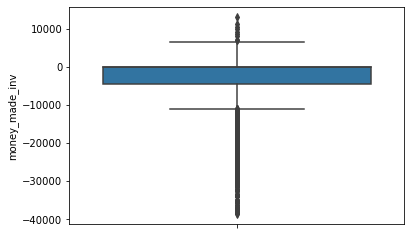

In [416]:
sns.boxplot(data = data, y = "money_made_inv")

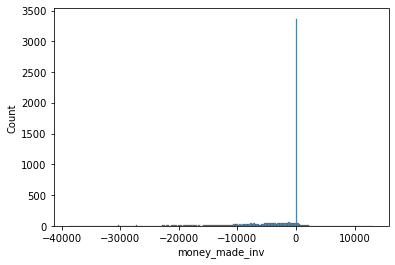

In [417]:
ax = sns.histplot(data=data, x="money_made_inv", bins = 200)

In [418]:
data['acc_now_delinq'].value_counts()

0    9551
1      40
2       5
Name: acc_now_delinq, dtype: int64

In [419]:
data['acc_now_delinq'].replace(2, 1, inplace = True)

<AxesSubplot:xlabel='acc_now_delinq', ylabel='money_made_inv'>

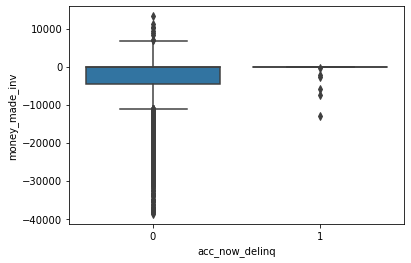

In [420]:
sns.boxplot(data = data,  x = "acc_now_delinq", y = "money_made_inv")

In [421]:
data['acc_open_past_24mths'].value_counts()

3     1450
4     1368
2     1298
5     1084
1      946
6      870
7      656
8      483
0      397
9      324
10     232
11     152
12     111
13      70
14      54
15      24
16      22
18      16
17      13
22       6
19       6
21       3
23       3
28       2
20       2
24       2
26       1
25       1
Name: acc_open_past_24mths, dtype: int64

In [422]:
cutoff = data['acc_open_past_24mths'].value_counts() <= 100


mask_obs = data['acc_open_past_24mths'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 13)

data['acc_open_past_24mths'] = data['acc_open_past_24mths'].replace(mask_dict)

<AxesSubplot:xlabel='acc_open_past_24mths', ylabel='money_made_inv'>

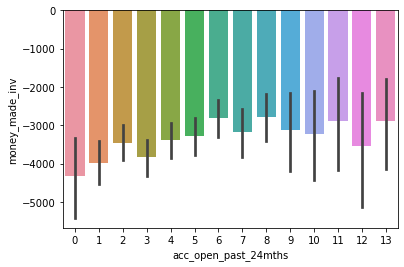

In [423]:
sns.barplot(data = data, x = "acc_open_past_24mths", y = "money_made_inv")

In [424]:
data['addr_state'].value_counts()

CA    1978
NY    1059
TX    1012
FL     834
NJ     400
IL     376
GA     343
PA     325
OH     315
VA     246
MI     224
NC     221
MA     205
MD     187
AZ     184
CO     148
WA     138
MN     126
MO     116
CT     114
IN     112
TN     107
NV      88
AL      81
LA      71
OR      71
WI      68
SC      68
KY      53
OK      50
KS      42
AR      38
MS      28
NM      26
UT      26
NH      22
RI      22
HI      11
DC      10
NE       8
WV       7
DE       6
ME       6
VT       6
WY       5
MT       5
ID       4
AK       2
ND       2
Name: addr_state, dtype: int64

In [425]:
#creating "other" category for states with less than 300 occurrances
cutoff = data['addr_state'].value_counts() <= 300


mask_obs = data['addr_state'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 'other')

data['addr_state'] = data['addr_state'].replace(mask_dict)

<AxesSubplot:xlabel='addr_state', ylabel='money_made_inv'>

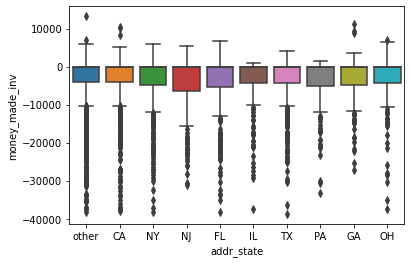

In [426]:
sns.boxplot(data = data, x = "addr_state", y = "money_made_inv")

In [427]:
data['annual_inc'].describe()

count    9.596000e+03
mean     8.657562e+04
std      1.061851e+05
min      1.000000e+04
25%      5.200000e+04
50%      7.100000e+04
75%      1.000000e+05
max      6.200000e+06
Name: annual_inc, dtype: float64

(0.0, 1000000.0)

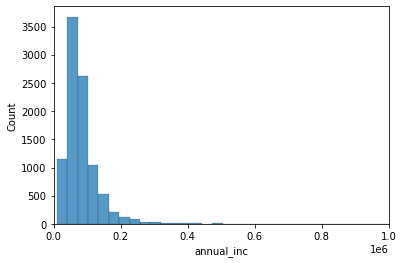

In [428]:
ax = sns.histplot(data=data, x="annual_inc", bins = 200)
ax.set_xlim(0, 1e+06)

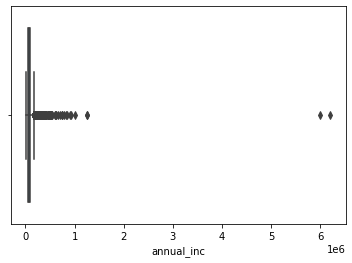

In [429]:
ax = sns.boxplot(data=data, x="annual_inc")

<AxesSubplot:xlabel='annual_inc', ylabel='money_made_inv'>

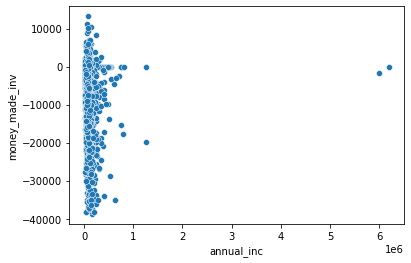

In [430]:
sns.scatterplot(data = data, x = "annual_inc", y = "money_made_inv")

In [431]:
data['application_type'].value_counts()

Individual    9429
Joint App      167
Name: application_type, dtype: int64

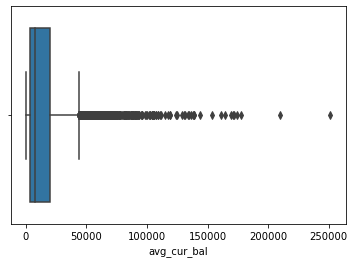

In [432]:
ax = sns.boxplot(data=data, x="avg_cur_bal")

<AxesSubplot:xlabel='avg_cur_bal', ylabel='money_made_inv'>

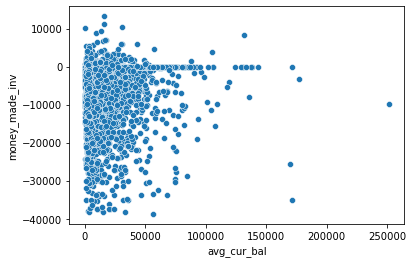

In [433]:
sns.scatterplot(data = data, x = "avg_cur_bal", y = "money_made_inv")

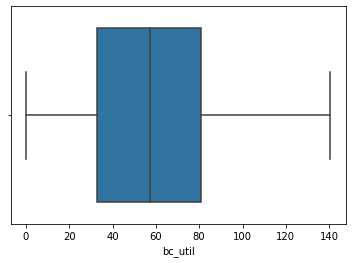

In [434]:
ax = sns.boxplot(data=data, x="bc_util")

<AxesSubplot:xlabel='bc_util', ylabel='money_made_inv'>

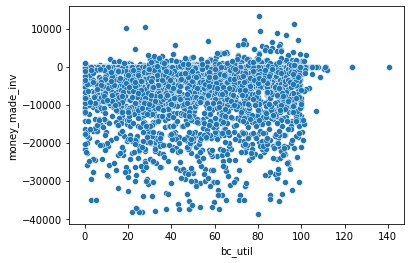

In [435]:
sns.scatterplot(data = data, x = "bc_util", y = "money_made_inv")

In [436]:
data['delinq_2yrs'].value_counts()

0     7774
1     1207
2      365
3      117
4       47
5       39
6       23
7       10
10       4
9        3
8        2
14       2
18       1
12       1
13       1
Name: delinq_2yrs, dtype: int64

In [437]:
cutoff = data['delinq_2yrs'].value_counts() <= 100


mask_obs = data['delinq_2yrs'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 4)

data['delinq_2yrs'] = data['delinq_2yrs'].replace(mask_dict)

In [438]:
data['delinq_2yrs'].value_counts()

0    7774
1    1207
2     365
4     133
3     117
Name: delinq_2yrs, dtype: int64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='money_made_inv'>

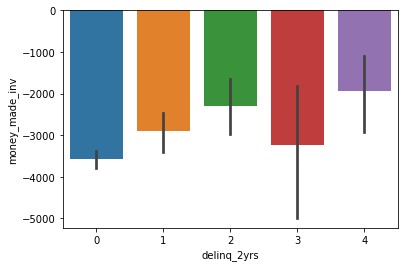

In [439]:
sns.barplot(data = data, x = "delinq_2yrs", y = "money_made_inv")

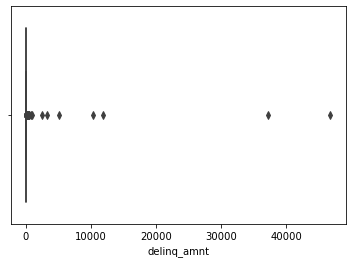

In [440]:
ax = sns.boxplot(data=data, x="delinq_amnt")

<AxesSubplot:xlabel='delinq_amnt', ylabel='money_made_inv'>

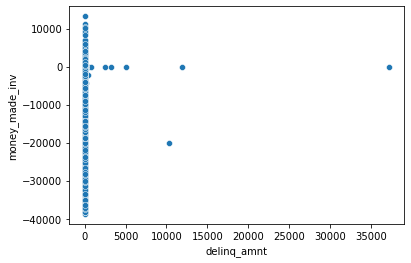

In [441]:
sns.scatterplot(data = data, x = "delinq_amnt", y = "money_made_inv")

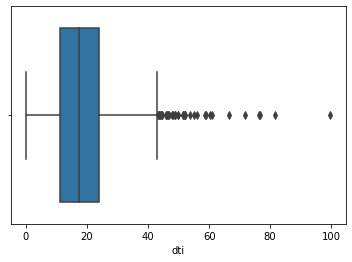

In [442]:
ax = sns.boxplot(data=data, x="dti")

<AxesSubplot:xlabel='dti', ylabel='money_made_inv'>

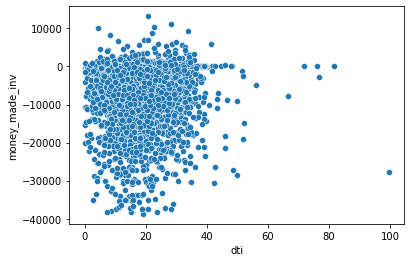

In [443]:
sns.scatterplot(data = data, x = "dti", y = "money_made_inv")

In [444]:
data['earliest_cr_line'].describe()

count         9596
unique         537
top       Aug-2002
freq            75
Name: earliest_cr_line, dtype: object

In [445]:
data['emp_length'].value_counts()

10+ years    3519
2 years       942
3 years       828
< 1 year      731
5 years       645
1 year        625
4 years       619
6 years       459
7 years       423
8 years       414
9 years       387
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='money_made_inv'>

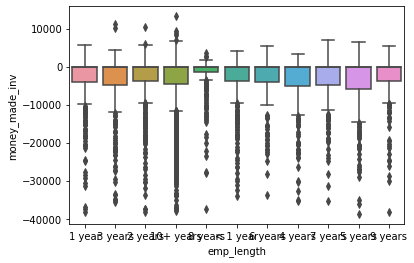

In [446]:
sns.boxplot(data = data, x = "emp_length", y = "money_made_inv")

In [447]:
data['emp_title'].value_counts()

Teacher                     708
Manager                     695
Owner                       413
Supervisor                  298
Registered Nurse            284
                           ... 
bus driver                    1
Group Leader                  1
Business Systems Analyst      1
Durability Test Driver        1
Software Consultant           1
Name: emp_title, Length: 964, dtype: int64

In [448]:
#creating "other" category for titles with less than 200 occurrances
cutoff = data['emp_title'].value_counts() < 200


mask_obs = data['emp_title'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 'other')

data['emp_title'] = data['emp_title'].replace(mask_dict)

In [449]:
data['emp_title'].value_counts()

other               6483
Teacher              708
Manager              695
Owner                413
Supervisor           298
Registered Nurse     284
Driver               267
RN                   231
Sales                217
Name: emp_title, dtype: int64

<AxesSubplot:xlabel='emp_title', ylabel='money_made_inv'>

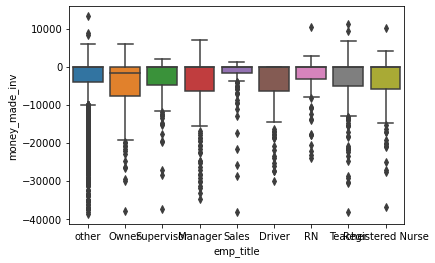

In [450]:
sns.boxplot(data = data, x = "emp_title", y = "money_made_inv")

In [451]:
data['grade'].value_counts()

B    2861
C    2708
A    2198
D    1164
E     463
F     156
G      46
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='money_made_inv'>

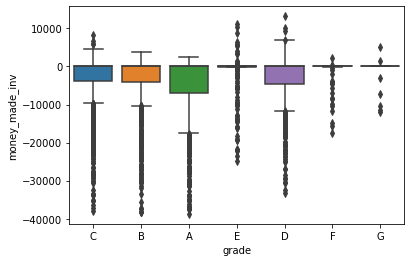

In [452]:
sns.boxplot(data = data, x = "grade", y = "money_made_inv")

In [453]:
data['home_ownership'].value_counts()

MORTGAGE    4573
RENT        3952
OWN         1068
ANY            3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='money_made_inv'>

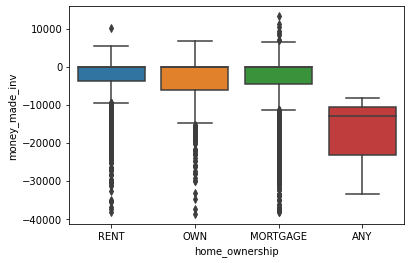

In [454]:
sns.boxplot(data = data, x = "home_ownership", y = "money_made_inv")

In [455]:
data['initial_list_status'].value_counts()

w    7841
f    1755
Name: initial_list_status, dtype: int64

<AxesSubplot:xlabel='initial_list_status', ylabel='money_made_inv'>

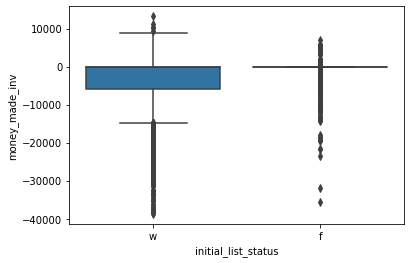

In [456]:
sns.boxplot(data = data, x = "initial_list_status", y = "money_made_inv")

In [457]:
data['int_rate'].describe()

count    9596.000000
mean       12.525205
std         4.801266
min         5.310000
25%         8.590000
50%        11.990000
75%        15.040000
max        30.990000
Name: int_rate, dtype: float64

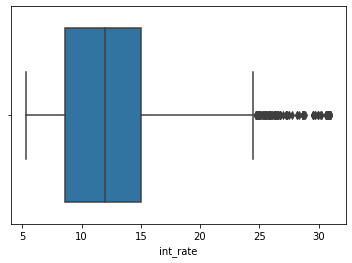

In [458]:
ax = sns.boxplot(data=data, x="int_rate")

<AxesSubplot:xlabel='int_rate', ylabel='money_made_inv'>

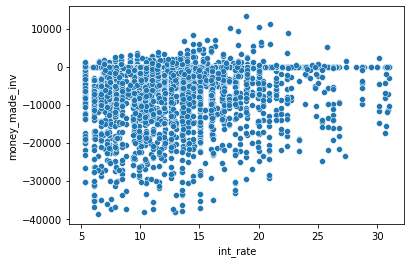

In [459]:
sns.scatterplot(data = data, x = "int_rate", y = "money_made_inv")

In [460]:
data['last_credit_pull_d'].describe()

count         9596
unique          60
top       Feb-2019
freq          6059
Name: last_credit_pull_d, dtype: object

In [461]:
data['loan_amnt'].describe()

count     9596.000000
mean     15559.678512
std       9245.514400
min       1000.000000
25%       8300.000000
50%      14000.000000
75%      21000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

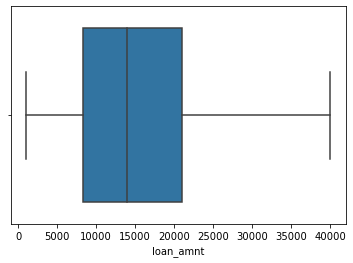

In [462]:
ax = sns.boxplot(data=data, x="loan_amnt")

<AxesSubplot:xlabel='loan_amnt', ylabel='money_made_inv'>

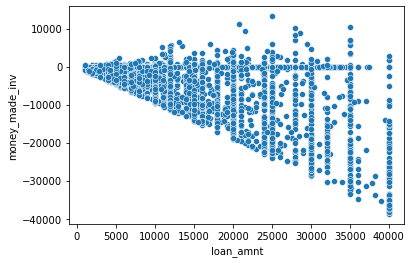

In [463]:
sns.scatterplot(data = data, x = "loan_amnt", y = "money_made_inv")

In [464]:
data['mort_acc'].value_counts()

0     4101
1     1728
2     1484
3      982
4      611
5      348
6      159
7       83
8       48
9       24
10       9
13       5
11       4
12       3
14       2
19       1
18       1
41       1
17       1
15       1
Name: mort_acc, dtype: int64

In [465]:
cutoff = data['mort_acc'].value_counts() < 10


mask_obs = data['mort_acc'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 10)

data['mort_acc'] = data['mort_acc'].replace(mask_dict)

In [466]:
data['mort_acc'].value_counts()

0     4101
1     1728
2     1484
3      982
4      611
5      348
6      159
7       83
8       48
10      28
9       24
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='mort_acc', ylabel='money_made_inv'>

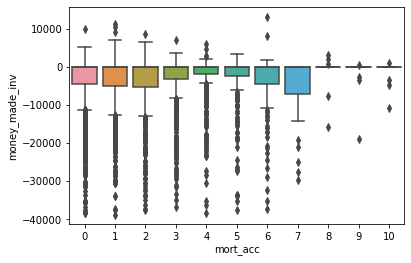

In [467]:
sns.boxplot(data = data, x = "mort_acc", y = "money_made_inv")

In [468]:
data['num_sats'].value_counts()

9     851
8     762
10    758
11    735
12    727
7     704
6     580
13    579
14    513
15    451
5     417
16    381
17    303
4     279
18    259
19    206
20    160
21    128
22    123
3     109
23    107
24     82
25     65
26     45
27     39
29     37
2      35
28     32
31     26
30     23
33     18
32     10
34      8
36      6
37      6
45      5
1       5
35      5
39      4
38      3
46      2
42      2
40      1
44      1
54      1
43      1
60      1
55      1
Name: num_sats, dtype: int64

<AxesSubplot:xlabel='num_sats', ylabel='money_made_inv'>

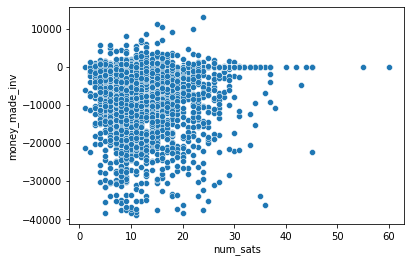

In [469]:
sns.scatterplot(data = data, x = "num_sats", y = "money_made_inv")

In [470]:
data['num_tl_120dpd_2m'].value_counts()

0    9590
1       5
2       1
Name: num_tl_120dpd_2m, dtype: int64

In [471]:
data['num_tl_30dpd'].value_counts()

0    9563
1      30
2       3
Name: num_tl_30dpd, dtype: int64

In [472]:
data['num_tl_90g_dpd_24m'].value_counts()

0     9073
1      409
2       59
3       21
4       15
6        5
5        4
7        2
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
Name: num_tl_90g_dpd_24m, dtype: int64

In [473]:
data['out_prncp_inv'].describe()

count     9596.000000
mean      4431.620034
std       7492.922855
min          0.000000
25%          0.000000
50%          0.000000
75%       6749.215000
max      39118.690000
Name: out_prncp_inv, dtype: float64

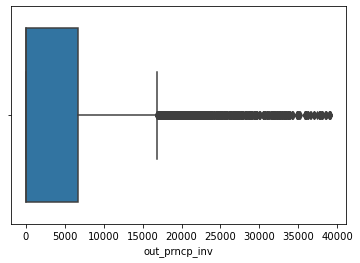

In [474]:
ax = sns.boxplot(data=data, x="out_prncp_inv")

<AxesSubplot:xlabel='out_prncp_inv', ylabel='money_made_inv'>

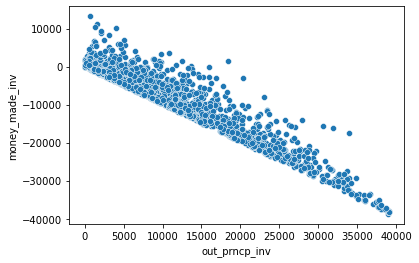

In [475]:
sns.scatterplot(data = data, x = "out_prncp_inv", y = "money_made_inv")

In [476]:
data['pub_rec'].value_counts()

0    8144
1    1206
2     172
3      33
4      20
5      11
8       3
7       3
9       2
6       2
Name: pub_rec, dtype: int64

In [477]:
cutoff = data['pub_rec'].value_counts() < 150


mask_obs = data['pub_rec'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 2)

data['pub_rec'] = data['pub_rec'].replace(mask_dict)

In [478]:
data['pub_rec'].value_counts()

0    8144
1    1206
2     246
Name: pub_rec, dtype: int64

<AxesSubplot:xlabel='pub_rec', ylabel='money_made_inv'>

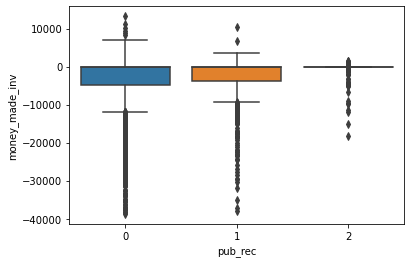

In [479]:
sns.boxplot(data = data, x = "pub_rec", y = "money_made_inv")

In [480]:
data['pub_rec_bankruptcies'].value_counts()

0    8518
1    1016
2      50
3       9
5       2
7       1
Name: pub_rec_bankruptcies, dtype: int64

In [481]:
# effectively turning predictor into dummy variable by combining all non-zero categories
cutoff = data['pub_rec_bankruptcies'].value_counts() < 1000


mask_obs = data['pub_rec_bankruptcies'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 1)

data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].replace(mask_dict)

In [482]:
data['pub_rec_bankruptcies'].value_counts()

0    8518
1    1078
Name: pub_rec_bankruptcies, dtype: int64

In [483]:
data['purpose'].value_counts()

debt_consolidation    5429
credit_card           2235
home_improvement       640
other                  527
major_purchase         242
small_business         141
medical                103
car                     88
vacation                70
house                   60
moving                  52
renewable_energy         8
wedding                  1
Name: purpose, dtype: int64

In [484]:
#creating "other" category for purposes with less than 80 occurrances
cutoff = data['purpose'].value_counts() < 80


mask_obs = data['purpose'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 'other')

data['purpose'] = data['purpose'].replace(mask_dict)

In [485]:
data['purpose'].value_counts()

debt_consolidation    5429
credit_card           2235
other                  718
home_improvement       640
major_purchase         242
small_business         141
medical                103
car                     88
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='money_made_inv'>

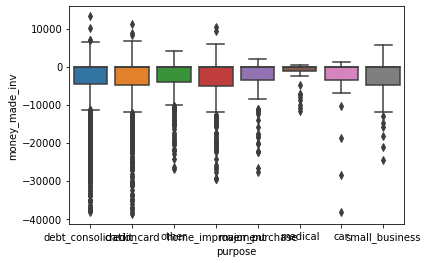

In [486]:
sns.boxplot(data = data, x = "purpose", y = "money_made_inv")

In [487]:
data['sub_grade'].value_counts()

C1    632
B5    600
B1    578
B2    577
B3    559
C3    551
B4    547
A5    538
C4    513
C2    509
C5    503
A4    486
A1    428
A3    390
A2    356
D1    289
D2    270
D3    225
D4    212
D5    168
E1    121
E2     96
E4     88
E3     81
E5     77
F1     57
F2     35
F3     29
F4     18
F5     17
G1     15
G3     11
G5      9
G2      7
G4      4
Name: sub_grade, dtype: int64

In [488]:
data['term'].value_counts()

36 months    6957
60 months    2639
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='money_made_inv'>

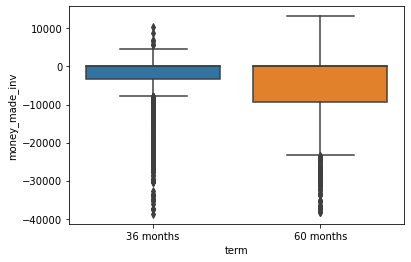

In [489]:
sns.boxplot(data = data, x = "term", y = "money_made_inv")

In [490]:
data['tot_coll_amt'].describe()

count     9596.000000
mean       248.270529
std       1794.365647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      95806.000000
Name: tot_coll_amt, dtype: float64

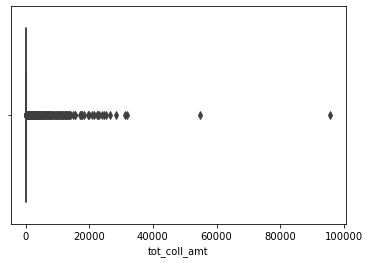

In [491]:
ax = sns.boxplot(data=data, x="tot_coll_amt")

<AxesSubplot:xlabel='tot_coll_amt', ylabel='money_made_inv'>

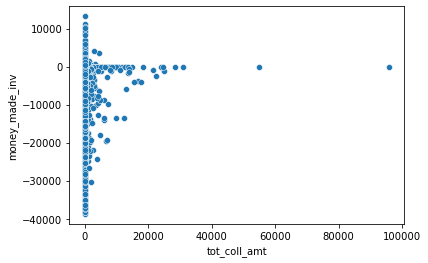

In [492]:
sns.scatterplot(data = data, x = "tot_coll_amt", y = "money_made_inv")

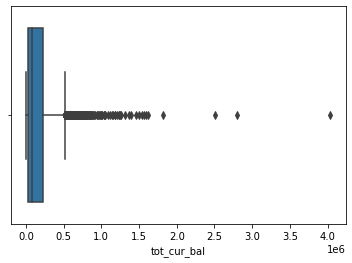

In [493]:
ax = sns.boxplot(data=data, x="tot_cur_bal")

<AxesSubplot:xlabel='tot_cur_bal', ylabel='money_made_inv'>

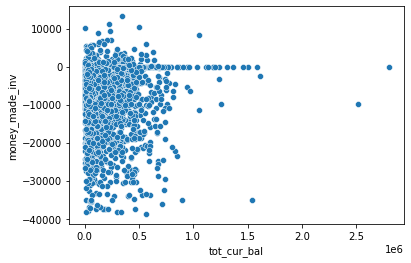

In [494]:
sns.scatterplot(data = data, x = "tot_cur_bal", y = "money_made_inv")

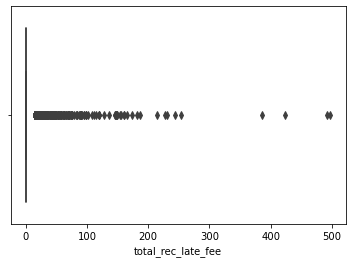

In [495]:
ax = sns.boxplot(data=data, x="total_rec_late_fee")

<AxesSubplot:xlabel='total_rec_late_fee', ylabel='money_made_inv'>

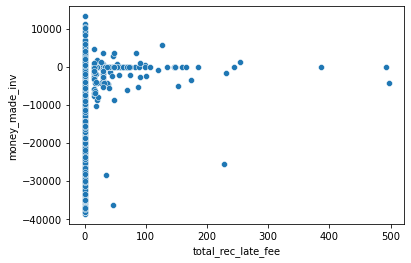

In [496]:
sns.scatterplot(data = data, x = "total_rec_late_fee", y = "money_made_inv")

In [497]:
data['verification_status'].value_counts()

Source Verified    4186
Not Verified       3282
Verified           2128
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='money_made_inv'>

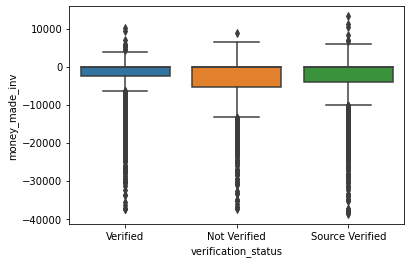

In [498]:
sns.boxplot(data = data, x = "verification_status", y = "money_made_inv")

# Variable Selection

In [499]:
#drop pass 1 - low variance and/or uncorrelated with response
data = data.drop(columns = ['annual_inc', 'acc_now_delinq', 'delinq_amnt', 'earliest_cr_line', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pub_rec', 'sub_grade', 'total_rec_late_fee', 'application_type'])

In [500]:
#drop pass 2 - unimportant predictors from initial models 
data = data.drop(columns = ['last_credit_pull_d', 'acc_open_past_24mths', 'addr_state', 'bc_util', 'delinq_2yrs', 'emp_length', 'emp_title', 'home_ownership', 'mort_acc', 'num_sats', 'pub_rec_bankruptcies', 'purpose', 'tot_coll_amt', 'tot_cur_bal', 'verification_status', 'grade'])

# Model tuning

In [501]:
data = pd.get_dummies(data)

In [502]:
# Re-separating train and test data
train = data.iloc[0:5778, :]

In [503]:
test = data.iloc[5778:, :]

In [504]:
X = train.drop(columns = ['id', 'money_made_inv'])
y = train['money_made_inv']

In [505]:
Xtest = test.drop(columns = ['id', 'money_made_inv'])

## MARS

C:\Users\alexk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '10 CV ERROR')

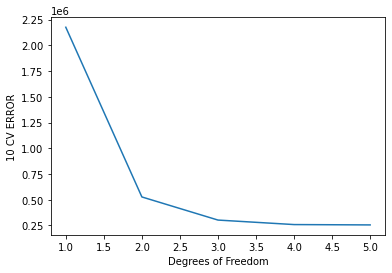

In [506]:
cv_score = {}

for df in range(1,6):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    
    model = Earth(max_terms = 500, max_degree = df)
    
    scores = cross_val_score(model, X, y,scoring='neg_mean_squared_error',
    cv=cv, n_jobs=-1)
    cv_score[df] = np.mean(-scores)
   

sns.lineplot(np.arange(1,6),list(cv_score.values()))
plt.xlabel('Degrees of Freedom')
plt.ylabel('10 CV ERROR')

In [507]:
cv_score

{1: 2175423.6580242263,
 2: 526699.8941481033,
 3: 302143.2610562708,
 4: 258362.91208286057,
 5: 255020.33729119034}

In [508]:
model1 = Earth(max_terms = 500, max_degree = 4)

model1.fit(X,y)

C:\Users\alexk\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\alexk\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(max_degree=4, max_terms=500)

In [509]:
#showing interactions and pruned basis functions
print(model1.summary())

Earth Model
------------------------------------------------------------------------------------------------
Basis Function                                                            Pruned  Coefficient   
------------------------------------------------------------------------------------------------
(Intercept)                                                               No      167.996       
h(out_prncp_inv-632.19)                                                   No      -1.10027      
h(632.19-out_prncp_inv)                                                   No      -0.274903     
int_rate*h(out_prncp_inv-632.19)                                          No      -0.0130342    
loan_amnt                                                                 No      -0.0180039    
h(out_prncp_inv-1338.93)*loan_amnt                                        No      1.3677e-06    
h(1338.93-out_prncp_inv)*loan_amnt                                        No      1.40995e-05   
h(out_prncp_inv-69

## Pruned Decision Tree

In [510]:
model = DecisionTreeRegressor(random_state = 1)
path = model.cost_complexity_pruning_path(X,y)

alphas=path['ccp_alphas']

In [511]:
start_time = time.time()
cv = KFold(n_splits = 5,shuffle=True,random_state=1)
tree = GridSearchCV(DecisionTreeRegressor(random_state=1, min_samples_split=4), param_grid = {'ccp_alpha':alphas}, 
                     scoring = 'neg_mean_squared_error',n_jobs=-1,verbose=1,cv=cv)
tree.fit(X, y)

print (tree.best_score_, tree.best_params_)
total_time = time.time()-start_time
print(total_time)

Fitting 5 folds for each of 5206 candidates, totalling 26030 fits
-997134.5841591677 {'ccp_alpha': 1.3777598130841737}
130.75439953804016


In [512]:
model2 = DecisionTreeRegressor(ccp_alpha=1.3777598130841737, min_samples_split=4, random_state=1)
model2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=1.3777598130841737, min_samples_split=4,
                      random_state=1)

In [513]:
#finding feature importances for model
feature_importances = model2.feature_importances_

importances = pd.concat([pd.Series(X.columns), pd.Series(feature_importances)], axis = 1)

importances.sort_values(by=1, ascending = False).iloc[0:10, :]

,0,1
4,out_prncp_inv,0.949884
3,loan_amnt,0.023152
2,int_rate,0.018826
8,term_60 months,0.003591
0,avg_cur_bal,0.002165
7,term_36 months,0.001513
1,dti,0.000728
6,initial_list_status_w,0.000139
5,initial_list_status_f,0.000002


## Stacking Ensemble

In [515]:
en=StackingRegressor(estimators = [('mars',model1),('tree',model2)],
                     final_estimator=LinearRegression(),                                          
                    cv = KFold(n_splits = 5, shuffle = True, random_state=1))
en.fit(X,y)

C:\Users\alexk\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\alexk\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\alexk\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('mars', Earth(max_degree=4, max_terms=500)),
                              ('tree',
                               DecisionTreeRegressor(ccp_alpha=1.3777598130841737,
                                                     min_samples_split=4,
                                                     random_state=1))],
                  final_estimator=LinearRegression())

In [516]:
pred = en.predict(Xtest)

# Submission

In [517]:
regression_submission = pd.DataFrame(pred)

In [518]:
regression_submission['id'] = test.id

In [519]:
regression_submission = regression_submission[['id', 0]]

In [520]:
regression_submission = regression_submission.rename(columns = {0:'Predicted'})

In [522]:
regression_submission.to_csv('regression_submission.csv', index = False)